<a href="https://colab.research.google.com/github/julian-masdatascience/ML/blob/master/COVID_s_talller.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Paso 1 -  importamos librerias claves como son Pandas , Matplot  y dejo dos que se requieren para el trabajo 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker

In [0]:
# Paso 2 - Cargamos datos CSV del archivo  de la fuente de datos https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
paises = ['Colombia', 'Germany', 'United Kingdom', 'US', 'China']
# aplicamos filtro para los paises 
df = df[df['Country'].isin(paises)]

In [62]:
# Paso 3 - Analizamos la informaicón cargada
# visualizamos 10 lineas aleatorias del data frame
print(df.sample(10))
# visualice y analice los resultados con base en los resumenes estadisticos
print(df.describe())
print(df.info())

            Date         Country  Confirmed  Recovered  Deaths
7622  2020-03-03        Colombia          0          0       0
65    2020-01-22         Germany          0          0       0
13940 2020-04-06         Germany     103374      28700    1810
7941  2020-03-04              US        149          7      11
5401  2020-02-20           China      75077      18014    2238
11535 2020-03-24         Germany      32986       3243     157
5355  2020-02-19  United Kingdom          9          8       0
1545  2020-01-30         Germany          4          0       0
11137 2020-03-22        Colombia        231          3       2
10905 2020-03-20  United Kingdom       4014         67     178
           Confirmed     Recovered        Deaths
count     420.000000    420.000000    420.000000
mean    36672.647619  10688.488095   1317.711905
std     82365.773313  22773.165076   3198.200834
min         0.000000      0.000000      0.000000
25%         9.000000      0.000000      0.000000
50%       595

In [0]:
# Paso 4 - Se crea una columna con la totalidad de los casos existentes
df['casos'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)
# visualizamos el resultado 

In [64]:
df.sample(5)

,Date,Country,Confirmed,Recovered,Deaths,casos
13495,2020-04-03,United Kingdom,38689,208,3611,42508
7760,2020-03-03,United Kingdom,51,8,0,59
8732,2020-03-09,Colombia,1,0,0,1
8361,2020-03-07,China,80770,55539,3072,139381
11086,2020-03-21,US,25600,176,307,26083


In [0]:
# Paso 5 - Generamos una tabla pivote con la información resumida por la cantidad de casos
df = df.pivot(index='Date', columns='Country', values='casos')
paises = list(df.columns)
# creamos una pivote llamada covid, con las fechas definidasa como indices para poderlo ordenar cronologicamente
covid = df.reset_index('Date')
covid.set_index(['Date'], inplace=True)
covid.columns = paises

In [66]:
## visualice y analice los resultados con base en los resumenes estadisticos
# visualizamos 10 lineas aleatorias del data frame
print(covid.sample(10))
# visualice y analice los resultados con base en los resumenes estadisticos
print(covid.describe())
print(covid.info())

             China  Colombia  Germany      US  United Kingdom
Date                                                         
2020-03-23  157586       283    29445   44582            7129
2020-03-16  152160        54     7356    4734            1628
2020-02-25  108095         0       31      57              21
2020-02-12   50958         0       16      15              10
2020-03-14  149830        22     4640    2793            1184
2020-04-09  163901      2466   173195  503325           74224
2020-02-01   12425         0        8       8               2
2020-01-27    3017         0        1       5               0
2020-04-05  163142      1608   130407  364139           53608
2020-04-10  164072      2750   178851  543911           84167
               China     Colombia        Germany             US  United Kingdom
count      84.000000    84.000000      84.000000      84.000000       84.000000
mean   107239.273810   442.309524   33432.547619   88794.297619    13485.809524
std     58172.34

In [0]:
# Paso 6 - Generamos una nueva tabla , ahora involucrando la población para ver el impacto que se tiene por cada 100.000 habitantes. Incluya los valores para Colombia
populations = { 'Germany': 83721496 ,  'US': 330548815, 'United Kingdom': 67802690 , 'China':1438027228,'Colombia':48000000 }
per_capita = covid.copy()
for pais in list(per_capita.columns):
    per_capita[pais] = per_capita[pais]/populations[pais]*100000

In [68]:
## visualice y analice los resultados con base en los resumenes estadisticos
# visualizamos 10 lineas aleatorias del data frame
print(per_capita.sample(10))
# visualice y analice los resultados con base en los resumenes estadisticos
print(per_capita.describe())
print(per_capita.info())

                China  Colombia     Germany          US  United Kingdom
Date                                                                   
2020-03-28  11.154031  1.300000   79.560212   37.683693       27.261455
2020-01-30   0.587402  0.000000    0.004778    0.001513        0.000000
2020-04-10  11.409520  5.729167  213.626140  164.547860      124.135193
2020-03-26  11.074477  1.052083   59.576097   25.934445       18.497791
2020-02-09   3.056479  0.000000    0.016722    0.004235        0.004425
2020-03-12  10.222685  0.018750    2.515483    0.518834        0.716786
2020-03-25  11.037274  1.004167   49.062668   20.293826       15.111495
2020-04-07  11.367170  4.020833  174.101046  130.300876       92.098116
2020-03-06   9.574089  0.002083    0.820578    0.085615        0.256627
2020-03-05   9.446553  0.000000    0.594829    0.071396        0.184358
           China   Colombia     Germany          US  United Kingdom
count  84.000000  84.000000   84.000000   84.000000       84.000000


In [0]:
# Paso 7 - proponga a los menos 3 visualizaciones interesantes 

Text(2020-01-23 00:00:00, 696265, 'Los casos agrupan información de enfermos actuales, recuperados y muerto')

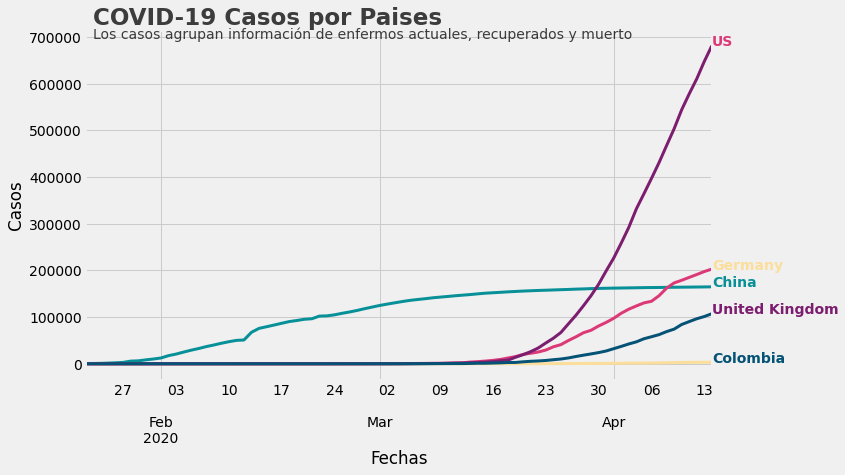

In [70]:
#Grafico 1
colors = {  'China':'#089099',   'Germany':'#FCDE9C', 'US':'#DC3977', 'United Kingdom':'#7C1D6F','Colombia':'#045275'}

#define el grafico a dibujar
plot = covid.plot(figsize=(10,6), color=list(colors.values()), linewidth=3, legend=False)
plot.set_xlabel('Fechas')
plot.set_ylabel('Casos')

# se asigna el nombre a la linea
for country in list(colors.keys()):
    plot.text(x = covid.index[-1], y = covid[country].max(), color = colors[country], s = country, weight = 'bold')

# se describen los labels
plot.text(x = covid.index[1], y = int(covid.max().max())+45000, s = "COVID-19 Casos por Paises", fontsize = 23, weight = 'bold', alpha = .75)
plot.text(x = covid.index[1], y = int(covid.max().max())+15000, s = "Los casos agrupan información de enfermos actuales, recuperados y muerto", fontsize = 14, alpha = .75)


Text(0.5, 1.0, 'COVID por cada 100.000 habitantes')

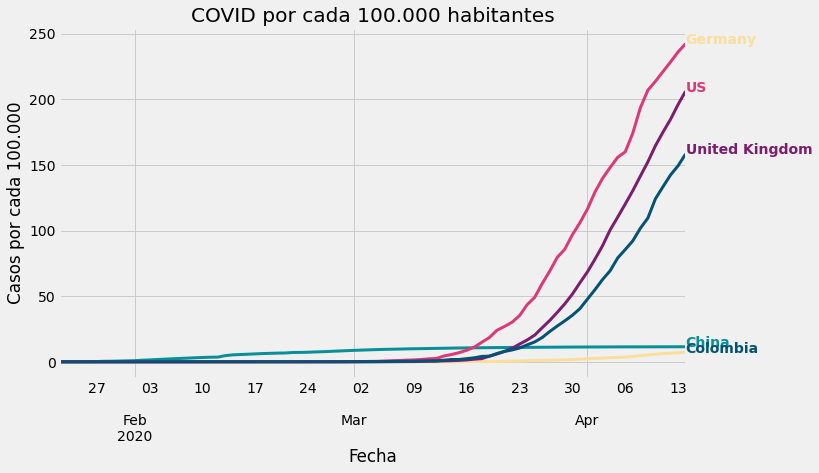

In [71]:
# Grafico 2

#define el grafico a dibujar
plot = per_capita.plot(figsize=(10,6), color=list(colors.values()), linewidth=3, legend=False)
plot.set_xlabel('Fecha')
plot.set_ylabel("Casos por cada 100.000")

# se asigna el nombre a la linea
for country in list(colors.keys()):
    plot.text(x = per_capita.index[-1], y = per_capita[country].max(), color = colors[country], s = country, weight = 'bold')

# se describen los labels
plot.set_title("COVID por cada 100.000 habitantes")


In [0]:
import seaborn as sns

In [73]:
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
paises = ['Colombia', 'Germany', 'United Kingdom', 'US', 'China']
# aplicamos filtro para los paises 
df = df[df['Country'].isin(paises)]
df.sample(5)

,Date,Country,Confirmed,Recovered,Deaths
13865,2020-04-05,United Kingdom,48436,229,4943
5587,2020-02-21,Colombia,0,0,0
10165,2020-03-16,United Kingdom,1551,21,56
805,2020-01-26,Germany,0,0,0
9286,2020-03-12,China,80932,62901,3172


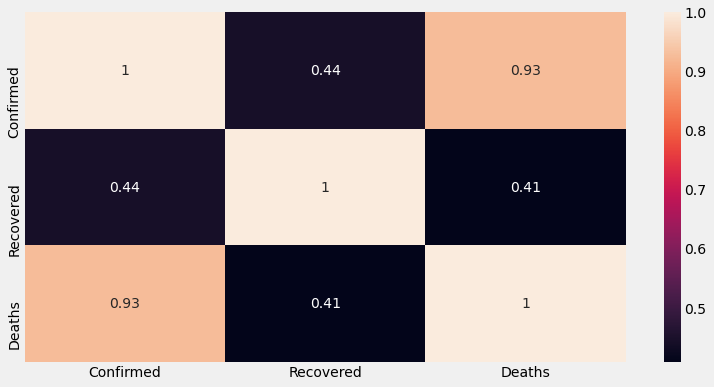

In [74]:
plt.figure(figsize= (12, 6))
sns.heatmap(df.corr(), annot=True)

In [0]:
# creo el mes
df['month'] = pd.DatetimeIndex(df['Date']).month

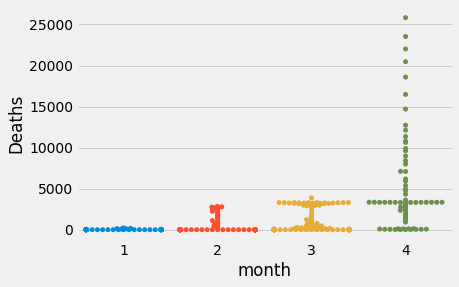

In [76]:

sns.swarmplot(x="month", y="Deaths", data=df)

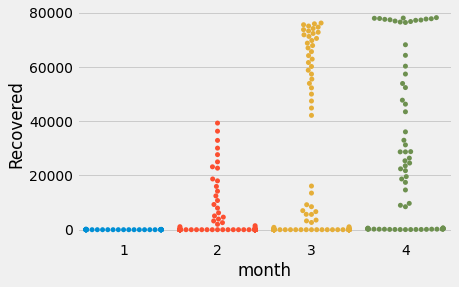

In [77]:
sns.swarmplot(x="month", y="Recovered", data=df)

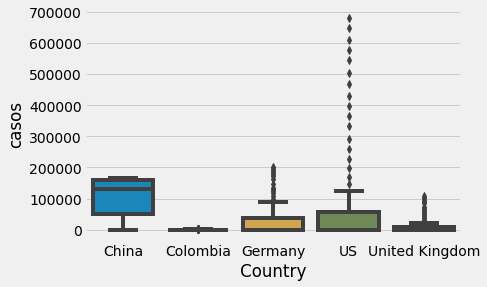

In [78]:
df['casos'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)
ax = sns.boxplot(x='Country', y='casos', data=df)
plt.show()

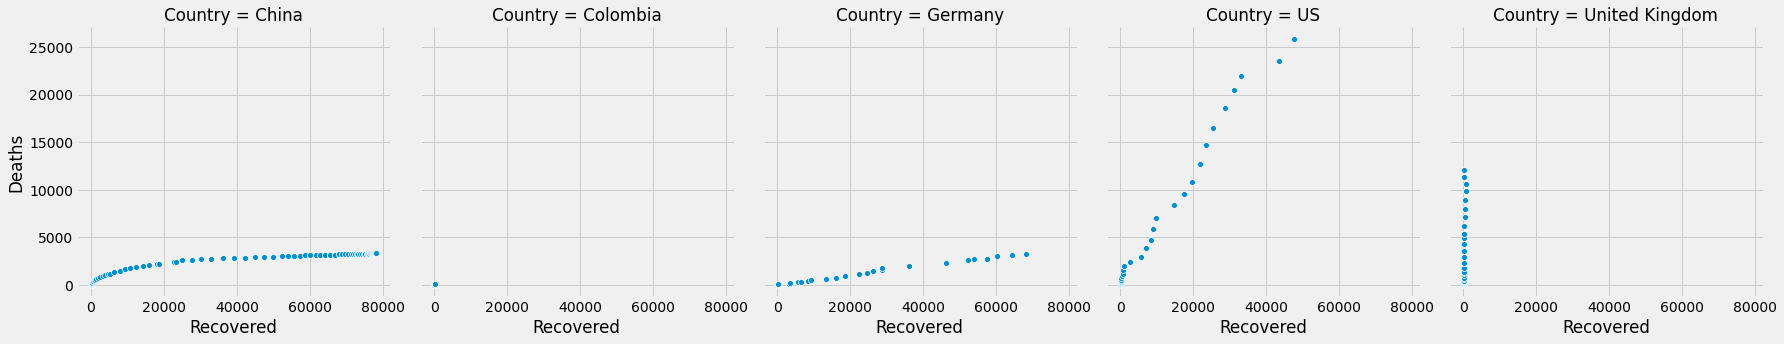

In [79]:
sns.relplot(x="Recovered", y="Deaths",  col="Country", height=5,kind="scatter",data=df)

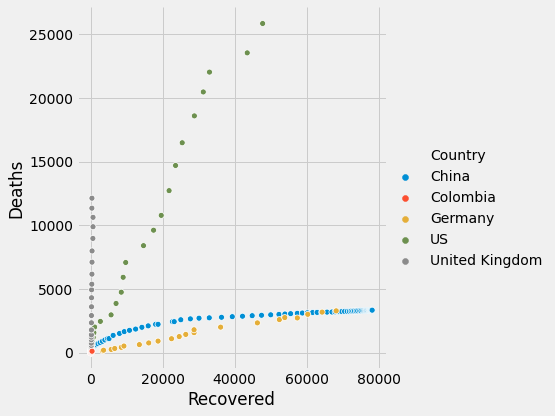

In [80]:
sns.relplot(x="Recovered", y="Deaths",  hue="Country", height=6,kind="scatter",data=df) 

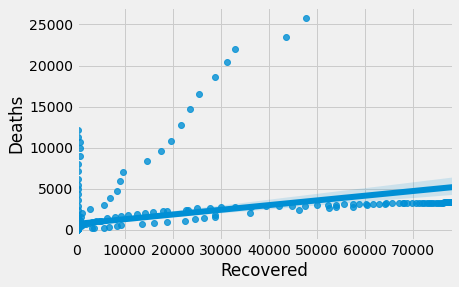

In [81]:
#correlación entre cuenta total y propina
sns.regplot(x="Recovered", y="Deaths",data=df)